The task for this exercise is to verify the ability of PCA in clustering data by projecting very high-dimensional
datapoints to 2 or 3 dimensions.<br>
 In particular, consider the dataset MNIST provided on Virtuale. <br>
 This dataset contains images of handwritten digits with dimension 28 × 28, together with a number from 0 to 9 representing the label. <br>
 You are asked to:

In [199]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

Load the dataset in memory and explore its head and shape to understand how the informations are placed inside of it;<br>
Split the dataset into the X matrix of dimension d × N, with d = 784 being the dimension of each datum, N is the number of datapoints, and Y ∈ R N containing the corresponding labels; <br>

In [200]:
dataset = scipy.io.loadmat('MNIST.mat')
# Matrix of images
X = dataset['X']
 # Label vector
Y = dataset['I']

print("Dimensions of X:", X.shape)
print("Dimensions of Y:", Y.shape)

# Display the first 5 labels.
print("First 5 labels:", Y[:5])



Dimensions of X: (256, 1707)
Dimensions of Y: (1, 1707)
First 5 labels: [[6 5 4 ... 7 9 8]]


Choose a number of digits (for example, 0, 6 and 9) and extract from X and Y the sub-dataset containing only the considered digits.<br>
 Re-call X and Y those datasets, since the originals are not required anymore;

In [201]:
idx = [0,6,9]

mask = [i for i in range(X.shape[1]) if Y[0][i] in idx]

X_new = X[:,mask]
Y_new = Y[:,mask]

print(X_new.shape)
print(Y_new.shape)


(256, 602)
(1, 602)


Set Ntrain < N and randomly sample a training set with Ntrain datapoints from X (and the corresponding Y ). Call them Xtrain and Ytrain. Everything else is the test set. Call it Xtest and
Ytest

In [202]:
N_train = int(X_new.shape[1] * 0.8)

idx = np.arange(0,X_new.shape[1])
np.random.shuffle(idx)

train_idx = idx[:N_train]
test_idx = idx[N_train:]



X_train = X_new[:,train_idx]
Y_train = Y_new[:,train_idx]

X_test = X_new[:,test_idx]
Y_test = Y_new[:,test_idx]

print(X_train.shape, X_test.shape)

(256, 481) (256, 121)


Implement the algorithms computing the PCA of Xtrain with a fixed k. Visualize the results (for k = 2) and the position of the centroid of each cluster;

In [203]:
#np.expand_dims(..., axis=1) reshapes a vector into a column matrix, ensuring the centroid is represented as a matrix with a single column.
def centroid(X):
    return np.expand_dims(np.mean(X,axis=1),axis=1)
    

(256, 481)
Centroid of Xc is : 2.7346391475952884e-15.
(256, 250)
(250, 481)


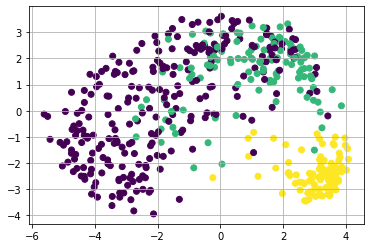

In [204]:
# Center the data (subtract the mean from each feature)
CX = centroid(X_train)
Xc = X_train - CX

print(Xc.shape)
print(f"Centroid of Xc is : {np.linalg.norm(centroid(Xc))}.")

U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# projects the centered data onto the top k principal components (represented by U_k) to obtain the reduced-dimensional data Z_k.
k = 250

U_k = U[:,:k]
print(U_k.shape)
Z_k = U_k.T @ Xc
print(Z_k.shape)

# Y_train assigns colors to the points based on the class labels provided in Y_train[0, :].
plt.scatter(Z_k[0,:],Z_k[1,:], c=Y_train[0,:])
plt.grid()
plt.show()


• Compute, for each cluster, the average distance from the centroid on the train set. Comment the results;

In [205]:
idx = [0,6,9]
distances = []


for i in idx:
    # Extract the data points for the current label
    cluster_idx = np.where(Y_train == i)[1]
    cluster = Z_k[:,cluster_idx]

    # Compute the centroid of these data points
    cluster_cx = centroid(cluster)
    # Compute the Euclidean distance between each data point and the centroid  -> axis = 0 columns 
    distance_cx = np.linalg.norm(cluster - cluster_cx, axis=0)
    # Append the average distance for the current cluster to the distances list
    distances.append(np.mean(distance_cx))

print(distances)



[5.024888246847773, 4.3913788295444, 4.005928718827158]


(256, 121)
Centroid of Xc is : 0.508807320868822.
(250, 121)


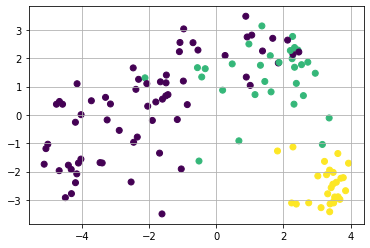

In [206]:
# Center the data (subtract the mean from each feature) both are centered in the same space
CX = centroid(X_train)
Xc_test = X_test - CX

print(Xc_test.shape)
print(f"Centroid of Xc is : {np.linalg.norm(centroid(Xc_test))}.")

# reuse the same U_k

Z_k_test = U_k.T @ Xc_test
print(Z_k_test.shape)

# Y_train assigns colors to the points based on the class labels provided in Y_train[0, :].
plt.scatter(Z_k_test[0,:],Z_k_test[1,:], c=Y_test[0,:])
plt.grid()
plt.show()

Compute, for each cluster, the average distance from the centroid on the test set. Comment the results;

In [207]:
idx = [0,6,9]
distances = []


for i in idx:
    # Extract the data points for the current label
    cluster_idx = np.where(Y_test == i)[1]
    cluster = Z_k_test[:,cluster_idx]

    # Compute the centroid of these data points
    cluster_cx = centroid(cluster)
    # Compute the Euclidean distance between each data point and the centroid  -> axis = 0 columns 
    distance_cx = np.linalg.norm(cluster - cluster_cx, axis=0)
    # Append the average distance for the current cluster to the distances list
    distances.append(np.mean(distance_cx))

print(distances)

[4.814100968223524, 4.370804776883874, 3.733510893839665]


Define a classification algorithm in this way: given a new observation x, compute the distance between
x and each cluster centroid. Assign x to the class corresponding the the closer centroid. Compute the accuracy of this algorithm on the test set and compute its accuracy;

In [208]:
# Compute the centroids of each cluster in the reduced-dimensional space using the training data
centroids_train = {}
for i in idx:
    cluster_idx = np.where(Y_train == i)[1]
    cluster = Z_k[:, cluster_idx]

    # Compute the centroid of these data points for training data
    cluster_cx = centroid(cluster)
    centroids_train[i] = cluster_cx[:, 0]

# Now, for the test data
centroids_test = {}
for i in idx:
    cluster_idx = np.where(Y_test == i)[1]  # Using Y_test here
    cluster = Z_k_test[:, cluster_idx]

    # Compute the centroid of these data points for test data
    cluster_cx = centroid(cluster)
    centroids_test[i] = cluster_cx[:, 0]


    



In [209]:
# Define the classification function to project data into PCA space and classify based on centroids
def classify_pca(x, centroids, U_k, CX_train):
    """
    Classify a data point based on its distance to centroids in PCA space.
    
    Parameters:
    - x: The data point to classify.
    - centroids: The centroids of the classes in PCA space.
    - U_k: The principal components matrix.
    - CX_train: The mean of the training data.
    
    Returns:
    - The predicted class label.
    """
    
    # Center the data point using the mean of the training data
    x_centered = x - CX_train
    
    # Project the centered data point into PCA space
    x_projected = U_k.T @ x_centered
    
    # Initialize a dictionary to store the distance of the data point from each centroid
    distances = {}
    
    # Compute the distance from the data point to each centroid
    for label, centroid in centroids.items():
        dist = np.linalg.norm(x_projected - centroid)
        distances[label] = dist
    
    # Find the label of the closest centroid
    predicted_label = min(distances, key=distances.get)
    
    return predicted_label

# Initialize a list to store the predicted labels for the test data
predicted_labels = []
CX_train = centroid(X_train)[:, 0]



# Classify each data point in the test set
for i in range(Xc_test.shape[1]):
    data_point = Xc_test[:, i]

    predicted_label = classify_pca(data_point, centroids_train, U_k, CX_train)
    predicted_labels.append(predicted_label)

# Convert the list of predicted labels to a numpy array
Y_pred = np.array(predicted_labels)

# Compute the classification accuracy
accuracy = np.mean(Y_pred == Y_test) * 100

# Print the accuracy (you can run this in your environment)
print(f"Classification accuracy: {accuracy:.2f}%")


Classification accuracy: 65.29%


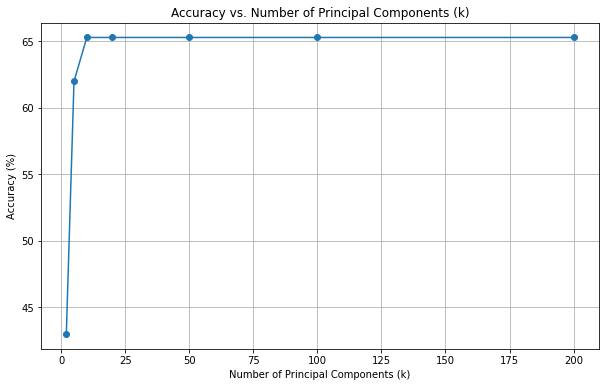

In [210]:
# List of k values to test
k_values = [2, 5, 10, 20, 50, 100, 200]
accuracies = []

# Loop through each k value
for k in k_values:
    # Compute the top k principal components from the training data
    U_k = U[:,:k]
    
    # Project the training data onto these components
    Z_k_train = U_k.T @ Xc
    
    # Project the test data onto these components
    Z_k_test = U_k.T @ Xc_test
    
    # Calculate the centroids of the training data in this reduced-dimensional space
    centroids = {}
    for i in idx:
        cluster_idx = np.where(Y_train == i)[1]
        cluster = Z_k_train[:, cluster_idx]
        cluster_cx = centroid(cluster)
        centroids[i] = cluster_cx[:, 0]
    
    # Classify the test data using these centroids
    Y_pred = np.array([classify_pca(Xc_test[:, i], centroids, U_k, CX_train) for i in range(Xc_test.shape[1])])
    
    # Compute the accuracy
    accuracy = np.mean(Y_pred == Y_test) * 100
    accuracies.append(accuracy)

# Plotting the accuracies against k values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Principal Components (k)')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


Calcolare l'SVD (Singular Value Decomposition) su dati centrati o non centrati ha un impatto significativo sulla rappresentazione dei dati e sulle informazioni ottenute dalle componenti principali. Ecco le differenze principali:

SVD su dati non centrati:

Le componenti principali ottenute rappresentano le variazioni nei dati rispetto all'origine.
La prima componente principale cattura la direzione di massima variazione nei dati.
Tutte le componenti principali sono influenzate dalla posizione dell'origine dei dati.
Le componenti principali possono contenere informazioni sulla media dei dati.
SVD su dati centrati (standard practice in PCA):

Le componenti principali ottenute rappresentano la variazione relativa alla media dei dati, ignorando il bias dovuto al valore medio.
La prima componente principale cattura la direzione di massima variazione nei dati centrati, indipendentemente dalla media.
Le componenti principali non sono influenzate dalla posizione dell'origine.
Le componenti principali contengono solo informazioni sulla variazione relativa ai dati, non sulla loro media.
Nella pratica di analisi dei dati e PCA, è comune lavorare con dati centrati, poiché ciò consente di isolare le variazioni intrinseche nei dati senza essere influenzati da variazioni dovute alla media o alla posizione dell'origine. Il centro dei dati è spostato nell'origine, e le componenti principali catturano la struttura della variazione relativa a questa nuova origine. Questo è particolarmente utile quando si desidera scoprire le direzioni principali di variazione nei dati e rimuovere l'effetto della media o il bias sistematico.




